<div class="alert alert-info">
<p style="text-align:center">
    <a href="https://www.i2a2.academy/pt" target="_blank">
    <img src="https://static.wixstatic.com/media/b12e17_a52717e8445346ae808f308f705933fc~mv2.png" width="200" alt="I2A2 Logo Weblink"  />
    </a>
</p>
</div>

<div class="alert alert-warning" style="margin-top: 20px">
<h2><center>Regras do jogo</center></h2>
</div>

**Desefio realizado por:**
- Sergio Eduardo Palmiere
- Jalvo Alef


## I2A2 - 2023 - Sentiment Analysis
Prediction of review's rating from e-commerce data

https://www.kaggle.com/competitions/i2a2-2023-sentiment-analysis/overview

### Overview
Welcome to the I2A2 NLP class challenge.

The purpose of this competition is to explore a dataset that contains information about the rating of an e-commerce website's product shopping experience. Your goal is to use the NLP techniques you learned to create a model capable of predicting the rating given by the user (1 to 5 stars) based on their comments.

### Description
The dataset is a corpus which contains varied information, that it can be useful for several NLP/CL tasks.
The first that comes to mind is sentiment analysis. Sentiment analysis is the task of assigning a sentiment (or a position) to the content of a given text.

The complete corpus has 132,373 reviews, left by 112,993 different users regarding 48,001 unique products. The reviews were collected from January to May, 2018. All reviews submitted to the e-commerce website are present in the corpus. It means that one can find offensive language, repeated reviews and reviews composed by only one word in the present data. These kinds of reviews are often not accepted to be displayed on the website. So, this means that this resource is richer than one could get crawling the e-commerce website.

### Evaluation
Submissions are evaluated on classification accuracy (the percent of labels that are predicted correctly) for every review. The sentiment labels are:

1 - negative
2 - somewhat negative
3 - neutral
4 - somewhat positive
5 - positive.

In [39]:
# Bibliotecas utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns  # Importe o Seaborn
import torch

from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from textblob import TextBlob
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 


# Utilizar códigos abaixo somente se necessário para ignorar avisos 'warnings'
import warnings
warnings.filterwarnings('ignore')


In [40]:
# Definição da função para análise de sentimento
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity < 0:
        return 0  # Ruim
    elif polarity == 0:
        return 1  # Regular
    else:
        return 2  # Bom

In [42]:
# Carregamento dos dados de treinamento
pd.read_csv(os.getcwd() + '\\train.csv', dtype={'column_6': str} )


,ID,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend,rating
0,1,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,1958.0,F,RJ,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,Estou contente com a compra entrega rápida o ú...,Yes,4
1,2,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,1996.0,M,SC,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes,4
2,3,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,1984.0,M,SP,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes,4
3,4,2018-01-01 01:27:23,28b1844e1cd24dd2288b7cafb052a0b46aed53ab28e1c1...,1979.0,M,PA,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",Produto imperdível,"Excelente produto, por fora em material acríli...",Yes,5
4,5,2018-01-01 01:54:38,48907a04d70947344017b351e8fc232bfc80dae2c33ac2...,NaN,NaN,NaN,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas",ótimo,"produto mto bom, com essa garrafinha vc pode a...",Yes,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79420,79421,2018-05-31 23:14:36,112736aaeb05b58ebf449e73706a2934792acc165d09d8...,1979.0,M,DF,132439701,"Smart TV LED 39"" Philco PH39N86DSGW HD com Con...",NaN,TV e Home Theater,TV,Cancelei não pega Netflix,Infelizmente o Netflix não funciona e esse era...,No,1
79421,79422,2018-05-31 23:30:50,15f20e95ff44163f3175aaf67a5ae4a94d5030b409e521...,1988.0,M,RS,17962233,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,NaN,Câmeras e Filmadoras,Acessórios para Câmeras e Filmadoras,Ótimo produto!,"Vale muito, estou usando no controle do Xbox e...",Yes,5
79422,79423,2018-05-31 23:42:25,def7cf9028b0673ab8bca3b1d06e085461fafb88cd48d9...,1979.0,F,SP,132631701,Mop Giratório Fit + Refil Extra - At Home,NaN,Utilidades Domésticas,Material de Limpeza,Sensacional,"Prático e barato, super indico o produto para ...",Yes,5
79423,79424,2018-05-31 23:46:48,e6fb0b19277d01c2a300c7837a105f3c369377e92f9c19...,1991.0,M,RJ,6774907,Etiquetas Jurídicas Vade Mecum - Marca Fácil,marca facil,Papelaria,Material de Escritório,O produto não é bom.,"Material fraco, poderia ser melhor. Ficou deve...",No,1


In [ ]:
# Limpeza e preenchimento de valores nulos no conjunto de treinamento
df_train['reviewer_gender'].fillna('I', inplace=True)
df_train['recommend_to_a_friend'].fillna('talvez', inplace=True)
df_train['review_text'].fillna('Sem avaliação', inplace=True)
df_train['reviewer_state'].fillna('Brasil', inplace=True)


In [5]:
# Adição da coluna de análise de sentimento
df_train['analise_sent'] = df_train['review_text'].apply(analyze_sentiment)


In [6]:
# Divisão dos dados em conjuntos de treinamento, teste e validação
train_data, test_data = train_test_split(df_train, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)


In [7]:
# Seleção de features e alvo
features = df_train[['reviewer_gender', 'reviewer_state', 'recommend_to_a_friend', 'analise_sent']]
target = df_train['rating']


In [8]:
# Codificação das variáveis categóricas
features = pd.get_dummies(features, columns=['reviewer_gender', 'reviewer_state', 'recommend_to_a_friend'])


In [9]:
# Divisão dos dados em treinamento, teste e validação
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.67, random_state=42)


In [10]:
# Inicialização e treinamento do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Previsões para os conjuntos de teste e validação
y_pred_test = model.predict(X_test)
y_pred_val = model.predict(X_val)


In [12]:
# Métricas de avaliação
mse_test = mean_squared_error(y_test, y_pred_test)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_test = r2_score(y_test, y_pred_test)
r2_val = r2_score(y_val, y_pred_val)


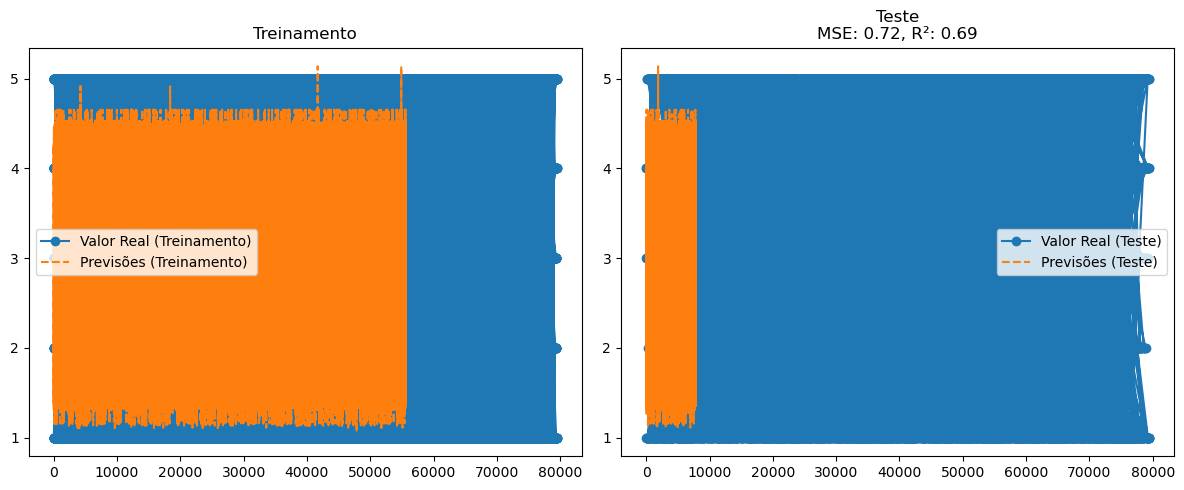

In [13]:
# Exibição dos gráficos de desempenho
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(y_train, label='Valor Real (Treinamento)', marker='o')
plt.plot(model.predict(X_train), label='Previsões (Treinamento)', linestyle='--')
plt.title('Treinamento')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(y_test, label='Valor Real (Teste)', marker='o')
plt.plot(y_pred_test, label='Previsões (Teste)', linestyle='--')
plt.title('Teste\nMSE: {:.2f}, R²: {:.2f}'.format(mse_test, r2_test))
plt.legend()
plt.tight_layout()
plt.show()

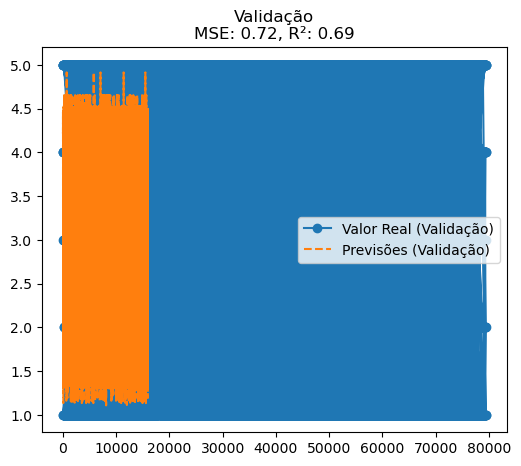

In [14]:
plt.figure(figsize=(6, 5))
plt.plot(y_val, label='Valor Real (Validação)', marker='o')
plt.plot(y_pred_val, label='Previsões (Validação)', linestyle='--')
plt.title('Validação\nMSE: {:.2f}, R²: {:.2f}'.format(mse_val, r2_val))
plt.legend()
plt.show()

In [43]:
# Carregamento dos dados de teste
pd.read_csv(os.getcwd() + '\\test.csv')


,ID,submission_date,reviewer_id,reviewer_birth_year,reviewer_gender,reviewer_state,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend
0,79426,2018-04-14 13:37:06,1e996f21a57bed83512bfb593648a8e84b7cc373e71262...,1982.0,M,SP,132444092,Smartphone Motorola Moto G 5S Dual Chip Androi...,NaN,Celulares e Smartphones,Smartphone,Excelente,"Celular muito bom, a imagem dele em jogos impr...",Yes
1,79427,2018-01-21 17:38:59,808841afbd6011d7f8edb3a938ea4b8ad4b996e92efa6e...,1978.0,M,PR,132267647,Notebook Acer F5-573G-75A3 Intel Core 7 I7 8GB...,acer,Informática,Notebook,Excelente custo x benefício,Excelente produto! Vale a pena o investimento!...,Yes
2,79428,2018-02-01 11:28:11,228ed5791cebda164ae1da88a519394572ff0a19c0faf5...,1989.0,F,MG,112941526,Máquina de Cortar Cabelo + Aparador Wahl Clipp...,wahl,Beleza e Perfumaria,Barbearia,Produto exelente,"Fiquei muito satisfeita com minha compra, cheg...",Yes
3,79429,2018-01-27 11:42:49,842b5dd4e35fca1e6fd224a9fc6379e54fc1dc17961f73...,1970.0,F,SP,132390047,Smartphone Samsung Galaxy J5 Pro Dual Chip And...,NaN,Celulares e Smartphones,Smartphone,Gostei muito do produto,Sem comentarios..................................,Yes
4,79430,2018-01-03 08:28:43,b96e6c9264f7ff66250cf74073797e547142dccc6bfc58...,1989.0,F,RJ,20739281,Sofá 4 Lugares Connect Retrátil e Reclinável S...,NaN,Móveis,Sofá,"Ótimo produto, entrega rápida e excelente!!!","Sofá grande, confortável. Entrega muito antes...",Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52943,132369,2018-01-02 16:13:02,1a5064f8ffac38e2017ad52c92095cc740015c75f296b5...,1952.0,M,RJ,129980708,DVD O Lar das Crianças Peculiares,NaN,Filmes e Séries,Aventura,Nota 1000 !,"Dvd novo, perfeito funcionamento. Vocês dizem ...",Yes
52944,132370,2018-04-23 08:15:23,f751ddc0c6a52720197d1197f23863beca1979dd93f746...,1989.0,M,SP,132215986,Smartphone Motorola Moto C Plus Dual Chip Andr...,NaN,Celulares e Smartphones,Smartphone,top,to adoradno ele duro 1 dia e meio e to gostadn...,Yes
52945,132371,2018-03-16 10:06:36,9460db35d1ca465ab706bdecd17624ef25b0f67228e3b0...,1984.0,M,RJ,124234896,Game Metal Gear Solid V: The Phantom Pain - On...,konami,Games,Playstation 3,Ótimo produto!,Produto vem legendado em português qual alta q...,Yes
52946,132372,2018-03-09 05:51:23,7713c38a68dcedce66203787af107ea2e5d4b2c9039000...,1957.0,F,SP,117698967,Ferro a Vapor Black & Decker Ceramic Gliss - V...,black & decker,Eletroportáteis,Ferro de Passar,Bom e bonito,Gosto de ferro pesado. Assim acho que a roupa ...,Yes


In [16]:
# Limpeza e preenchimento de valores nulos no conjunto de teste
df_test['reviewer_gender'].fillna('I', inplace=True)
df_test['recommend_to_a_friend'].fillna('talvez', inplace=True)
df_test['reviewer_state'].fillna('Brasil', inplace=True)
df_test['review_text'].fillna('Sem avaliação', inplace=True)


In [17]:
# Adição da coluna de análise de sentimento no conjunto de teste
df_test['analise_sent'] = df_test['review_text'].apply(analyze_sentiment)


In [18]:
# Seleção de features para previsão
X_new = df_test[['reviewer_gender', 'reviewer_state', 'recommend_to_a_friend', 'analise_sent']]


In [19]:
# Codificação das variáveis categóricas no conjunto de treinamento e teste
X_train = pd.get_dummies(X_train)
X_new = pd.get_dummies(X_new)


In [20]:
# Verifique se as colunas em X_new correspondem às colunas em X_train
missing_columns = set(X_train.columns) - set(X_new.columns)
for column in missing_columns:
    X_new[column] = 0  # Adicione as colunas ausentes com valores zero


In [21]:
# Previsões com o modelo para os novos dados
y_pred_new = model.predict(X_new)


In [22]:
# Cálculo das métricas RMSE, MAE e R-quadrado
rmse = mean_squared_error(y_test, y_pred_test, squared=False)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

In [23]:
# Exibição das métricas RMSE, MAE e R-quadrado
print("Resultados da Avaliação do Modelo:")
print(f"{'-'*40}")
print(f'Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}')
print(f'Erro Médio Absoluto (MAE): {mae:.2f}')
print(f'R-quadrado (R²): {r2:.2f}')
print(f"{'-'*40}")

Resultados da Avaliação do Modelo:
----------------------------------------
Raiz do Erro Quadrático Médio (RMSE): 0.85
Erro Médio Absoluto (MAE): 0.68
R-quadrado (R²): 0.69
----------------------------------------


### Métricas - "RMSE", "MAE", "R²"

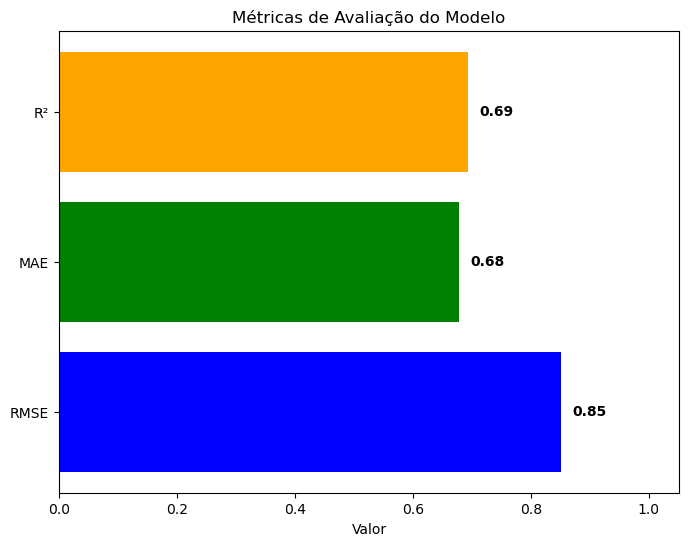

In [24]:
# Métricas
metrics = ["RMSE", "MAE", "R²"]
values = [rmse, mae, r2]

# Configuração do gráfico
plt.figure(figsize=(8, 6))
plt.barh(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Valor')
plt.title('Métricas de Avaliação do Modelo')
plt.xlim(0, max(values) + 0.2)  # Defina o limite máximo com base nos valores

# Anotação dos valores nas barras
for i, v in enumerate(values):
    plt.text(v + 0.02, i, f'{v:.2f}', va='center', color='black', fontweight='bold')

# Exibir o gráfico
plt.show()

In [25]:
# Adição das previsões como uma nova coluna 'predicted_rating' no DataFrame de teste
df_test['predicted_rating'] = y_pred_new


In [26]:
# Exibição do DataFrame de teste com as previsões
print(df_test[['ID', 'predicted_rating']])

           ID  predicted_rating
0       79426          4.451508
1       79427          4.304871
2       79428          4.250946
3       79429          4.235107
4       79430          4.213074
...       ...               ...
52943  132369          4.208618
52944  132370          4.230652
52945  132371          4.208618
52946  132372          4.235107
52947  132373          4.213074

[52948 rows x 2 columns]


In [44]:
df_test[['ID', 'predicted_rating']].to_csv("final_submission.csv", index=False)

In [45]:
# Abre o arquivo gerado
def abrir_arquivo_csv_no_excel(arquivo_csv):
    if os.path.isfile(arquivo_csv):
        os.system(f'start excel.exe {arquivo_csv}')
    else:
        print(f"O arquivo {arquivo_csv} não foi encontrado.")

# Exemplo de uso
arquivo_csv = "final_submission.csv"
abrir_arquivo_csv_no_excel(arquivo_csv)

### Gráfico de dispersão (scatter plot) das previsões em relação aos valores reais

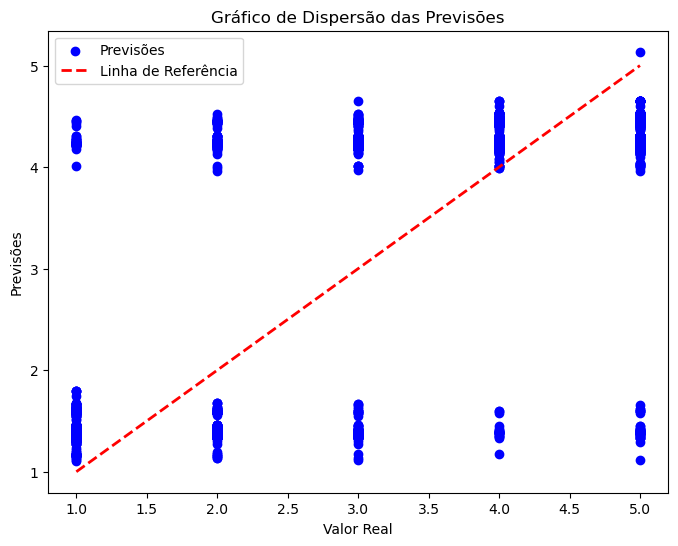

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', label='Previsões')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', linewidth=2, label='Linha de Referência')
plt.xlabel('Valor Real')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão das Previsões')
plt.legend()
plt.show()


### Histograma dos resíduos (diferença entre os valores reais e as previsões)

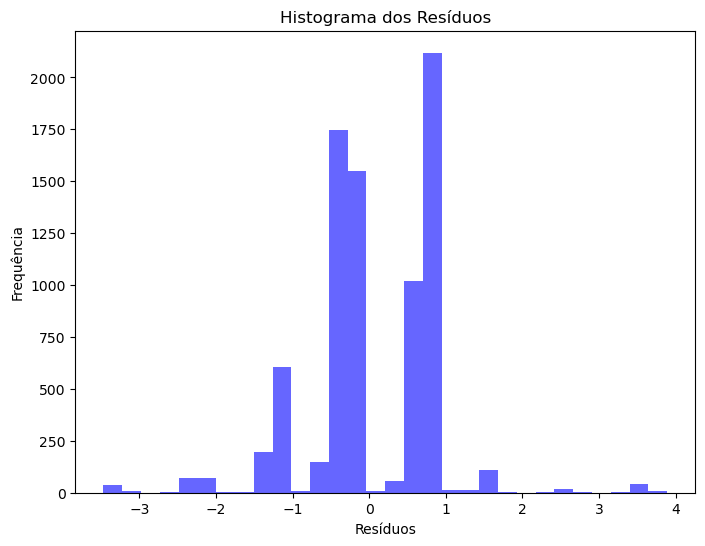

In [28]:
residuals = y_test - y_pred_test

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='blue', alpha=0.6)
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos')
plt.show()


### Gráfico de barras das importâncias das características

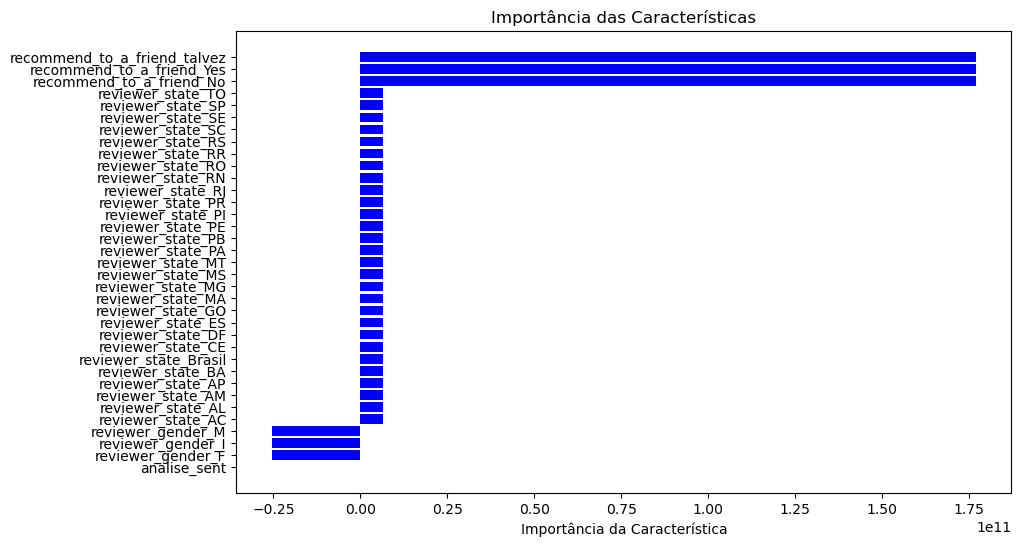

In [29]:
if hasattr(model, 'coef_'):
    feature_importances = model.coef_
    feature_names = X_train.columns

    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances, color='blue')
    plt.xlabel('Importância da Característica')
    plt.title('Importância das Características')
    plt.show()


### Gráfico de Densidade dos Resíduos

Verificar se os resíduos (diferença entre os valores reais e as previsões) estão distribuídos aleatoriamente em torno de zero.

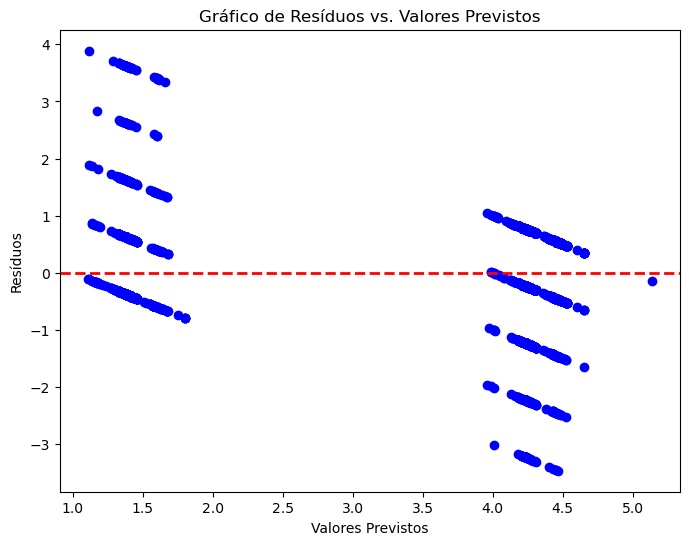

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_test, residuals, color='blue')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos vs. Valores Previstos')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.show()


### Gráfico de Densidade dos Resíduos

Mostra como as previsões se comparam aos valores reais ao longo das amostras.

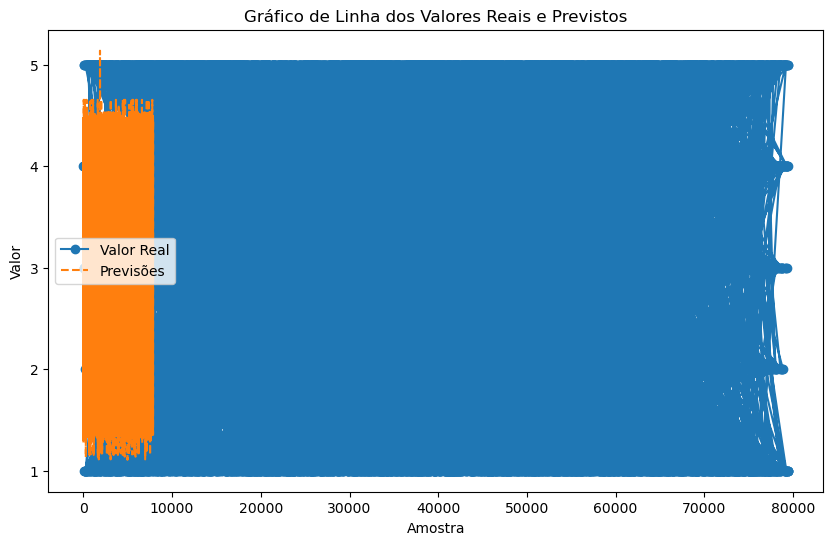

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Valor Real', marker='o')
plt.plot(y_pred_test, label='Previsões', linestyle='--')
plt.xlabel('Amostra')
plt.ylabel('Valor')
plt.title('Gráfico de Linha dos Valores Reais e Previstos')
plt.legend()
plt.show()


### Gráfico de Regressão de um Atributo

 Visualizar como uma única variável independente afeta as previsões.

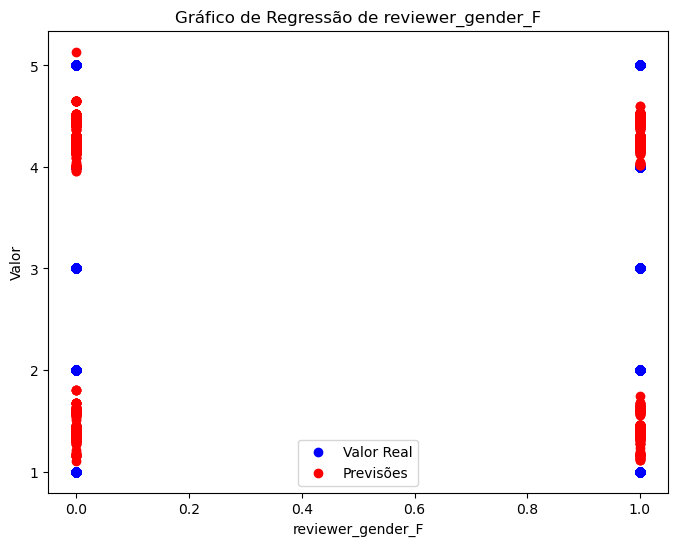

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test['reviewer_gender_F'], y_test, color='blue', label='Valor Real')
plt.scatter(X_test['reviewer_gender_F'], y_pred_test, color='red', label='Previsões')
plt.xlabel('reviewer_gender_F')
plt.ylabel('Valor')
plt.title('Gráfico de Regressão de reviewer_gender_F')
plt.legend()
plt.show()


### Gráfico de Barras do Promoter Score (NPS)

Este gráfico mostrará a distribuição das respostas de "recommend_to_a_friend".

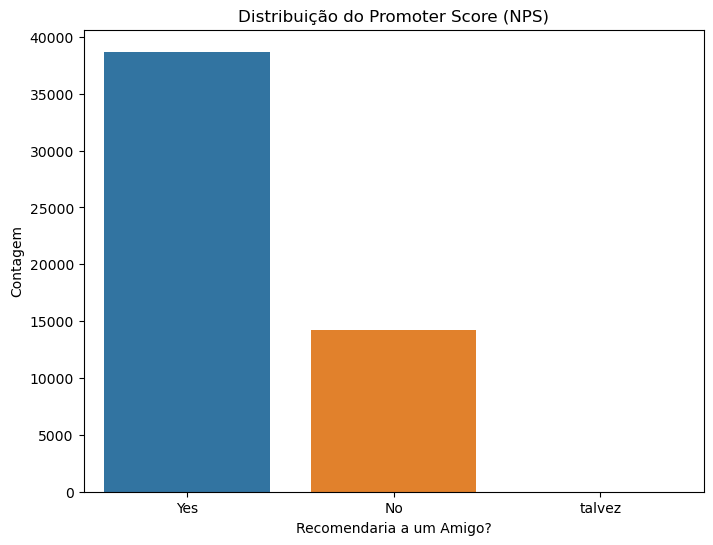

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_test, x='recommend_to_a_friend')
plt.xlabel('Recomendaria a um Amigo?')
plt.ylabel('Contagem')
plt.title('Distribuição do Promoter Score (NPS)')
plt.show()


### Gráfico de Barras do Promoter Score (NPS) vs. Análise de Sentimento

Este gráfico permitirá que você veja como a distribuição de sentimentos está relacionada ao NPS.

python

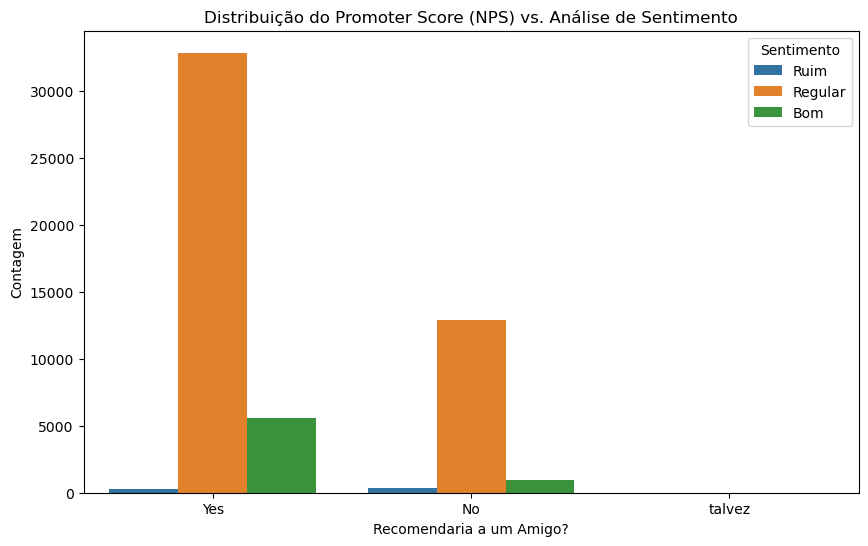

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_test, x='recommend_to_a_friend', hue='analise_sent')
plt.xlabel('Recomendaria a um Amigo?')
plt.ylabel('Contagem')
plt.title('Distribuição do Promoter Score (NPS) vs. Análise de Sentimento')
plt.legend(title='Sentimento', labels=['Ruim', 'Regular', 'Bom'])
plt.show()


### NPS (Net Promoter Score) e a Análise de Sentimento

gráfico de barras empilhadas, onde cada barra representará a contagem de sentimentos (Ruim, Regular, Bom) para cada categoria de "Recomendaria a um Amigo?".

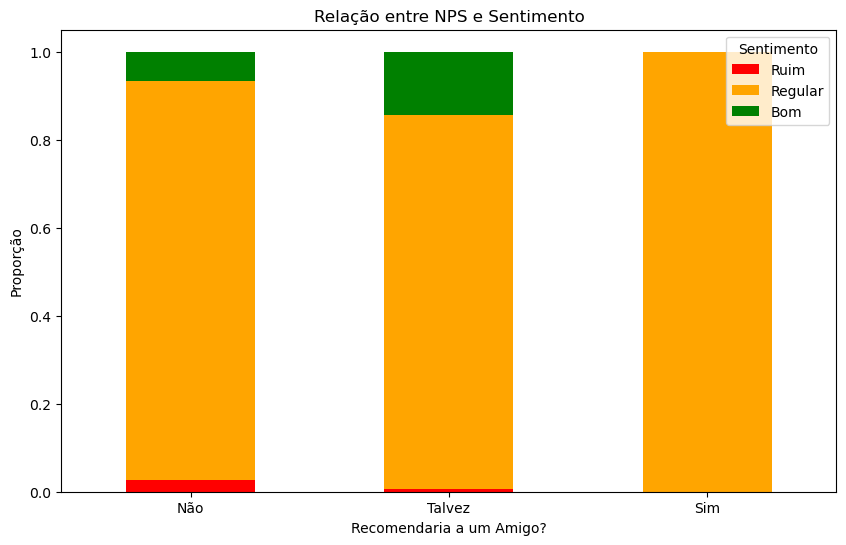

In [35]:
# Preparar os dados
data = df_test.groupby(['recommend_to_a_friend', 'analise_sent']).size().unstack()
data = data.div(data.sum(axis=1), axis=0)  # Normalizar os valores para que a soma seja 1

# Plotar o gráfico de barras empilhadas
colors = ['red', 'orange', 'green']
data.plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Configurações do gráfico
plt.xlabel('Recomendaria a um Amigo?')
plt.ylabel('Proporção')
plt.title('Relação entre NPS e Sentimento')
plt.xticks([0, 1, 2], ['Não', 'Talvez', 'Sim'], rotation=0)
plt.legend(['Ruim', 'Regular', 'Bom'], title='Sentimento')

# Exibir o gráfico
plt.show()


### Pizza - PIE (Torta), SIM para a recomendação.

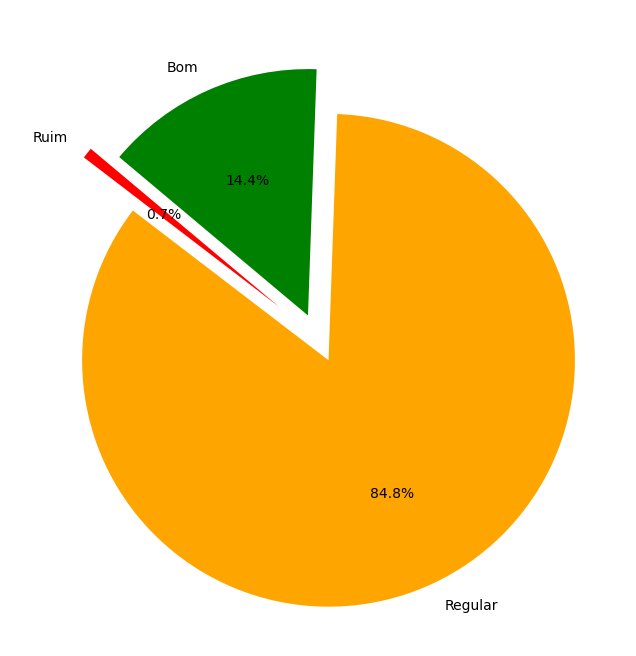

In [36]:
# Plotar o gráfico de pizza
colors = ['red', 'orange', 'green']
explode = (0.2, 0.1, 0.1)  # Aumente a explosão da fatia "Ruim"
plt.figure(figsize=(8, 8))
plt.pie(data.loc['Yes'], labels=['Ruim', 'Regular', 'Bom'], colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
# Adicione um título em negrito
plt.title(r'$\bf{Distribuição\ de\ Sentimento\ para\ "Sim"\ (Recomendaria\ a\ um\ Amigo)}$')
plt.show()


### Rosca - Donut, SIM para a recomendação.

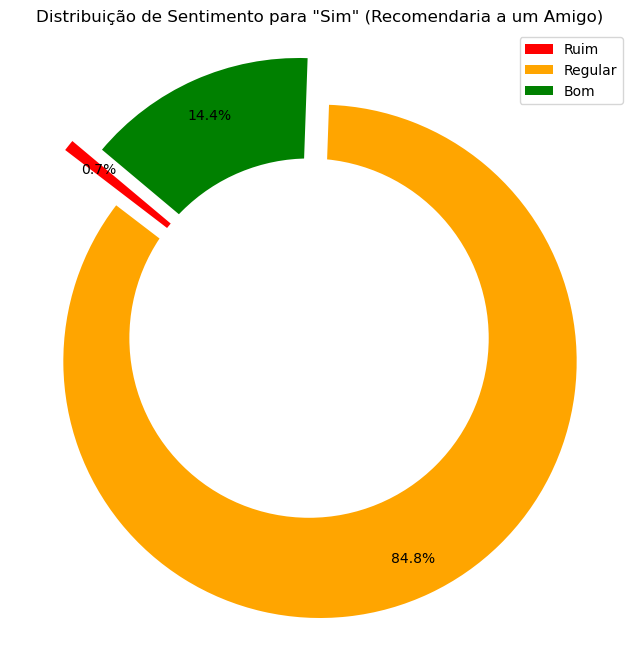

In [37]:
# Plotar o gráfico de rosca
plt.figure(figsize=(8, 8))
plt.pie(data.loc['Yes'], labels=None, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)
# Adicionar um círculo no centro para criar um gráfico de rosca
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribuição de Sentimento para "Sim" (Recomendaria a um Amigo)')
plt.legend(['Ruim', 'Regular', 'Bom'], loc='upper right')
plt.axis('equal')  # Para garantir que seja um círculo
plt.show()

